# View simulated atmosphere

- author  :Sylvie Dagoret-Campagne
- affiliaiton : IJCLab/IN2P3/CNRS
- creation date : April 11th 2020
- update date :

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import pandas as pd
import os
import sys
%matplotlib inline

In [2]:
from astropy.io import fits

In [4]:
#to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [5]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

In [6]:
%load_ext autoreload
%autoreload 2

# Configuration

In [10]:
DATADIR="../data/atm"

In [13]:
atmospheric_basename_files=os.listdir(DATADIR)

In [14]:
inputfile=os.path.join(DATADIR,atmospheric_basename_files[0])

# Open atmospheric file

In [15]:
hdu = fits.open(inputfile)

In [16]:
hdu.info()

Filename: ../data/atm/lsst_atm_10year_01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (958, 366)   float64   


## Extract info from header

In [19]:
hdr=hdu[0].header

In [20]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  958                                                  
NAXIS2  =                  366                                                  
NBATMSIM=                  365                                                  
ID_NUM  =                    0                                                  
ID_YEAR =                    1                                                  
ID_AM   =                    2                                                  
ID_VAOD =                    3                                                  
ID_PWV  =                    4                                                  
ID_O3   =                    5                                                  
ID_CLD  =                   

### Pick up the header column index 

In [21]:
NbAtmSimul=hdr['NBATMSIM']
idx_out_num=hdr['ID_NUM']
idx_out_year=hdr['ID_YEAR']
idx_out_am=hdr['ID_AM']
idx_out_vaod=hdr['ID_VAOD']
idx_out_pwv=hdr['ID_PWV']
idx_out_o3=hdr['ID_O3']
idx_out_cld=hdr['ID_CLD']
idx_out_res=hdr['ID_RES']

## Atmospheric data

In [22]:
data=hdu[0].data

In [23]:
data.shape

(366, 958)

In [30]:
vaod=data[1:,idx_out_vaod] # vertical aerosol depth
pwv=data[1:,idx_out_pwv]   # precipitable water vapor (mm)
o3=data[1:,idx_out_o3]     # ozone
cld=data[1:,idx_out_cld]   # clouds (not used)

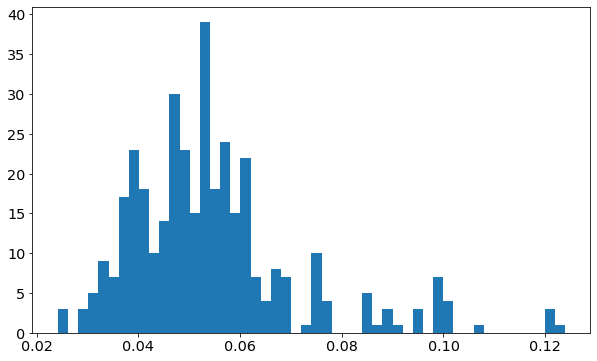

In [28]:
plt.hist(vaod,bins=50);

In [34]:
# Extract wavelength Wavelength
wl=data[0,idx_out_res:]
transm=data[1:,idx_out_res:]

(951,)


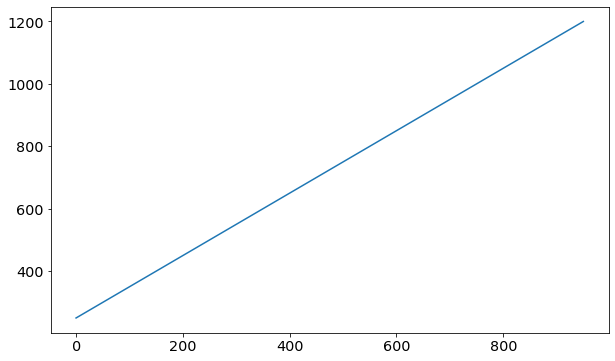

In [37]:
print(wl.shape)
plt.plot(wl)

In [35]:
transm.shape

(365, 951)

In [38]:
NBSIM=transm.shape[0]

Text(0.5, 1.0, 'image of atmospheric simulation')

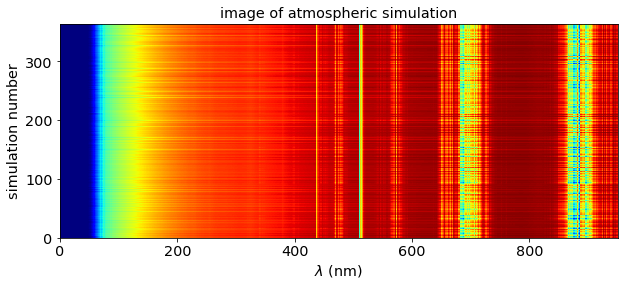

In [40]:
plt.imshow(transm,origin="lower",cmap='jet')
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("simulation number")
plt.title("image of atmospheric simulation")

In [41]:
# bins in wevelength
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBSIM)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBSIM), alpha=1)

Text(0.5, 1.0, 'Atmospheric transparency')

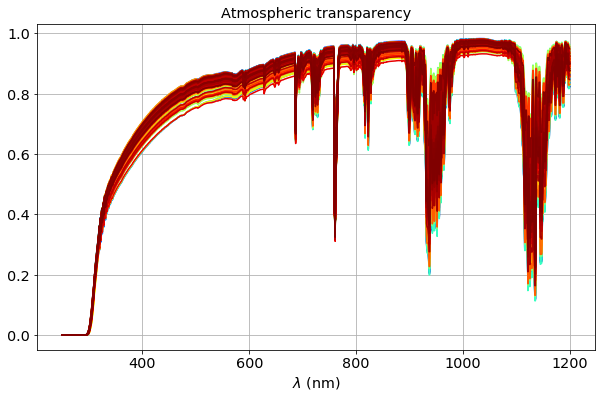

In [42]:
for idx in np.arange(NBSIM):
    colorVal=scalarMap.to_rgba(idx, alpha=1)
    plt.plot(wl,transm[idx,:],color=colorVal)
plt.grid(True)
plt.xlabel("$\lambda$ (nm)")
plt.title("Atmospheric transparency")